<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
         <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

### About the data set 1 (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Hepatitis:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country





## Table of Content

1. **[Bivariate Regression](#Bivariate)**
2. **[Multiple Linear Regression (MLR)](#MLR)**
3. **[Inferences about slope](#ins)**
4. **[Model Evaluation](#ML_eval)**
5. **[Assumptions of Linear Regression](#assum)**
6. **[Model Performance](#ml_perf)**

**Import the required libraries**

In [1]:
# type your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats
import statsmodels.formula.api as sfa     # Simple linear regression
from statsmodels.api import OLS    # Multiple linear Regression.

#### Load the first dataset and check the first five observations

Load the csv file and set the first column as index

In [2]:
# load the csv file
life = pd.read_csv(r'Life_Expectancy.csv',index_col=0)
# type your code here

In [3]:
life.head()

,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
Country,,,,,,,,,,,,,,,,,
Afghanistan,Developing,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,65.0
Albania,Developing,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,77.5
Algeria,Developing,19,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4,75.6
Angola,Developing,335,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4,52.4
Argentina,Developing,116,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3,76.3


### Let's begin with some hands-on practice exercises

<a id="Bivariate"> </a>
## 1. Bivariate Regression

## We shall use the life expectancy dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. How do we analyze the impact of adult mortality rate on average life expectancy of a country?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

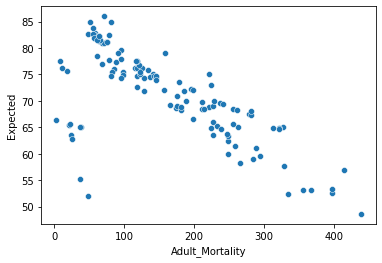

In [4]:
# type your code here
sns.scatterplot(life.Adult_Mortality,life.Expected)
plt.show()

In [5]:
life.loc[:,['Adult_Mortality','Expected']].corr()

,Adult_Mortality,Expected
Adult_Mortality,1.000000,-0.710868
Expected,-0.710868,1.000000


There is a very strong evidence that average mortality is linked with the target.

In [6]:
# Ho: that the adult mortality has no relation/ effect on tgt
# Ha: that the adult mortality has an relation/ effect on tgt

# stats.ttest_ind(life.Adult_Mortality,life.Expected)
stats.shapiro(life.Adult_Mortality),stats.shapiro(life.Expected)

(ShapiroResult(statistic=0.9492543339729309, pvalue=0.00014655495760962367),
 ShapiroResult(statistic=0.9651812314987183, pvalue=0.002752136904746294))

In [7]:
stats.mannwhitneyu(life.Adult_Mortality,life.Expected)

MannwhitneyuResult(statistic=11735.0, pvalue=7.834208681530223e-13)

Ho is rejected , So there is a realtion in adult mortality and tgt

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. A regression model is built to check the impact of Human Development Index (Income) on the life expectancy of a nation. What is the expected error value?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
# type your code here
from sklearn.metrics import mean_squared_error , mean_absolute_error

model = sfa.ols('Expected~Income_Index',data = life).fit()

In [9]:
# model.summary()
pred = model.predict(life.Income_Index)

In [10]:
print('MAE:',mean_absolute_error(life.Expected,pred))
print('RMSE:',np.sqrt(mean_squared_error(life.Expected,pred)))

MAE: 3.3843137257300997
RMSE: 4.534442387966917


<a id="MLR"> </a>
## 2. Multiple Linear Regression(MLR)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Analyze the impact of immunization on life expectancy. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
# type your code here
life.columns

Index(['Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis ', 'Measles ',
       ' BMI ', 'Underfive_Deaths ', 'Polio', 'Diphtheria ', ' HIV', 'GDP',
       'Population', 'Malnourished10_19 ', 'Malnourished5_9', 'Income_Index',
       'Schooling', 'Expected'],
      dtype='object')

In [12]:
from statsmodels.api import OLS,add_constant

localdf = life.iloc[:,[3,7,8,16]]

localdf = add_constant(localdf)

In [13]:
x = localdf.drop('Expected',axis = 1)
y = localdf.Expected

model = OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     6.395
Date:                Sat, 04 Feb 2023   Prob (F-statistic):           0.000468
Time:                        18:46:45   Log-Likelihood:                -431.15
No. Observations:                 124   AIC:                             870.3
Df Residuals:                     120   BIC:                             881.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          57.9881      3.524     16.453      0.000      51.010      64.966
Hepatitis      -0.1037      0.068     -1.528      0.129      -0.238       0.031
Polio           0.0910      0.043      2.099      0.038       0.005       0.177
Diphtheria      0.1613      0.082      1.969      0.051      -0.001       0.323
==============================================================================
Omnibus:                        4.513   Durbin-Watson:                   1.000
Prob(Omnibus):                  0.105   Jarque-Bera (JB):                4.279
Skew:                          -0.396   Prob(JB):                        0.118
Kurtosis:                       2.550   Cond. No.                         755.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

None of the predictor are good predictor.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. If the information that whether the country is a developed or a developing country is included, does it alter the impact of immunzation on life expectancy ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
# type your code here
localdf = life.iloc[:,[0,3,7,8,16]]
localdf = add_constant(localdf)
localdf = pd.get_dummies(localdf)

x = localdf.drop('Expected',axis = 1)
y = localdf.Expected

model = OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     14.06
Date:                Sat, 04 Feb 2023   Prob (F-statistic):           2.00e-09
Time:                        18:46:49   Log-Likelihood:                -416.35
No. Observations:                 124   AIC:                             842.7
Df Residuals:                     119   BIC:                             856.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                43.0048      2.230     19.283      0.000      38.589      47.421
Hepatitis            -0.0035      0.063     -0.056      0.955      -0.128       0.121
Polio                 0.0771      0.039      1.993      0.049       0.000       0.154
Diphtheria            0.0456      0.076      0.602      0.548      -0.104       0.196
Status_Developed     26.8042      1.685     15.912      0.000      23.469      30.140
Status_Developing    16.2006      1.184     13.686      0.000      13.857      18.545
==============================================================================
Omnibus:                        2.973   Durbin-Watson:                   1.211
Prob(Omnibus):                  0.226   Jarque-Bera (JB):                2.635
Skew:                          -0.355   Prob(JB):                        0.268
Kurtosis:                       3.077   Cond. No.                     1.05e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.65e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

since p value < 0.05 for Developing or developed so these are important feature.

But model is not a good model.

<a id="ins"> </a>
## 3. Inferences about slope

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Find the significant variables in the full model when all the variables are considered for prediction of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
# type your code here
df = pd.get_dummies(life,drop_first = True)
x = df.drop('Expected',axis = 1)
y = df.Expected

model = OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Expected   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              940.0
Date:                Sat, 04 Feb 2023   Prob (F-statistic):                   4.84e-108
Time:                        18:46:53   Log-Likelihood:                         -399.28
No. Observations:                 124   AIC:                                      830.6
Df Residuals:                     108   BIC:                                      875.7
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Adult_Mortality       -0.0069      0.007     -0.960      0.339      -0.021       0.007
Infant_Deaths         -0.0807      0.066     -1.224      0.223      -0.211       0.050
Hepatitis              0.0305      0.058      0.523      0.602      -0.085       0.146
Measles               -0.0002      0.000     -1.516      0.133      -0.000    5.18e-05
 BMI                  -0.0697      0.041     -1.696      0.093      -0.151       0.012
Underfive_Deaths       0.0712      0.048      1.482      0.141      -0.024       0.166
Polio                  0.0180      0.040      0.449      0.654      -0.061       0.097
Diphtheria             0.0388      0.073      0.535      0.593      -0.105       0.183
 HIV                   0.5728      0.455      1.258      0.211      -0.330       1.475
GDP                -3.684e-05    6.3e-05     -0.585      0.560      -0.000    8.81e-05
Population         -1.747e-08   1.58e-08     -1.107      0.271   -4.87e-08    1.38e-08
Malnourished10_19     -1.1120      0.546     -2.035      0.044      -2.195      -0.029
Malnourished5_9        1.6540      0.496      3.334      0.001       0.671       2.637
Income_Index          43.2384     11.241      3.846      0.000      20.956      65.520
Schooling              2.1667      0.601      3.608      0.000       0.976       3.357
Status_Developing      7.8535      1.821      4.313      0.000       4.244      11.463
==============================================================================
Omnibus:                        7.813   Durbin-Watson:                   1.591
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.565
Skew:                           0.588   Prob(JB):                       0.0228
Kurtosis:                       3.282   Cond. No.                     8.75e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.75e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
model.pvalues[model.pvalues <0.05]

Malnourished10_19     0.044283
Malnourished5_9       0.001172
Income_Index          0.000203
Schooling             0.000470
Status_Developing     0.000036
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. If economic indices are used to predict the life expectancy, calculate the total variation for the observed values of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
# type your code here
ybar = life.Expected.mean()
yi = life.Expected

SST = np.sum((yi-ybar)**2)
SST

8819.80548387097

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Determine the lower bound and upper bound for estimated value of life expectancy per unit change in HDI (for income)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
# type your code here
model = sfa.ols('Expected~Income_Index',data = life).fit()

stats.t.interval(0.95,loc= model.params[1],scale=model.bse[1],df=life.shape[0])

(37.576589199670515, 47.2719766829026)

<a id="ML_eval"> </a>
## 4. Model Evaluation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. A model is built to analyze the impact of mortality on Life expectancy. Would the addition of information about population of the country lead to a better prediction?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
# type your code here
sfa.ols('Expected~Adult_Mortality',data =life).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     124.6
Date:                Sat, 04 Feb 2023   Prob (F-statistic):           2.27e-20
Time:                        18:47:01   Log-Likelihood:                -396.71
No. Observations:                 124   AIC:                             797.4
Df Residuals:                     122   BIC:                             803.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          80.7106      1.005     80.272      0.000      78.720      82.701
Adult_Mortality    -0.0591      0.005    -11.164      0.000      -0.070      -0.049
==============================================================================
Omnibus:                       57.611   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.621
Skew:                          -1.821   Prob(JB):                     1.32e-35
Kurtosis:                       7.222   Cond. No.                         355.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
sfa.ols('Expected~Adult_Mortality+Population',data = life).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     62.12
Date:                Thu, 26 Jan 2023   Prob (F-statistic):           2.74e-19
Time:                        20:47:19   Log-Likelihood:                -396.54
No. Observations:                 124   AIC:                             799.1
Df Residuals:                     121   BIC:                             807.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          80.6129      1.023     78.783      0.000      78.587      82.639
Adult_Mortality    -0.0594      0.005    -11.133      0.000      -0.070      -0.049
Population       7.436e-09   1.33e-08      0.561      0.576   -1.88e-08    3.37e-08
==============================================================================
Omnibus:                       57.763   Durbin-Watson:                   1.634
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.344
Skew:                          -1.826   Prob(JB):                     9.22e-36
Kurtosis:                       7.231   Cond. No.                     8.61e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.61e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# Conclusion: Adding population decreases the adj. R square and the p value is greater than 0.05.
# we can conclude tha pop is an Insignificant var.
# No, it does not lead to better prediction.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model and test the significance of the overall model. <br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
# type your code here
df = pd.get_dummies(life,drop_first = True)
x = df.drop('Expected',axis = 1)
y = df.Expected

model = OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Expected   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              940.0
Date:                Sat, 04 Feb 2023   Prob (F-statistic):                   4.84e-108
Time:                        18:47:10   Log-Likelihood:                         -399.28
No. Observations:                 124   AIC:                                      830.6
Df Residuals:                     108   BIC:                                      875.7
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Adult_Mortality       -0.0069      0.007     -0.960      0.339      -0.021       0.007
Infant_Deaths         -0.0807      0.066     -1.224      0.223      -0.211       0.050
Hepatitis              0.0305      0.058      0.523      0.602      -0.085       0.146
Measles               -0.0002      0.000     -1.516      0.133      -0.000    5.18e-05
 BMI                  -0.0697      0.041     -1.696      0.093      -0.151       0.012
Underfive_Deaths       0.0712      0.048      1.482      0.141      -0.024       0.166
Polio                  0.0180      0.040      0.449      0.654      -0.061       0.097
Diphtheria             0.0388      0.073      0.535      0.593      -0.105       0.183
 HIV                   0.5728      0.455      1.258      0.211      -0.330       1.475
GDP                -3.684e-05    6.3e-05     -0.585      0.560      -0.000    8.81e-05
Population         -1.747e-08   1.58e-08     -1.107      0.271   -4.87e-08    1.38e-08
Malnourished10_19     -1.1120      0.546     -2.035      0.044      -2.195      -0.029
Malnourished5_9        1.6540      0.496      3.334      0.001       0.671       2.637
Income_Index          43.2384     11.241      3.846      0.000      20.956      65.520
Schooling              2.1667      0.601      3.608      0.000       0.976       3.357
Status_Developing      7.8535      1.821      4.313      0.000       4.244      11.463
==============================================================================
Omnibus:                        7.813   Durbin-Watson:                   1.591
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.565
Skew:                           0.588   Prob(JB):                       0.0228
Kurtosis:                       3.282   Cond. No.                     8.75e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.75e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<a id="assum"> </a>
## 4. Assumptions of Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. A model is built using all the features (full model) to predict the life expectancy. Check whether the residuals obtained form the model follow a normal distribution.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
# type your code here
stats.shapiro(model.resid)

ShapiroResult(statistic=0.9687382578849792, pvalue=0.005637099035084248)

Since p value < 0.05 we reject the Ho. so data is not normal.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Does the interaction of status of the country and its GDP have significant effect on life expectancy? (consider the full model)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# full model last made in Q9.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Expected   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              940.0
Date:                Sat, 04 Feb 2023   Prob (F-statistic):                   4.84e-108
Time:                        18:47:14   Log-Likelihood:                         -399.28
No. Observations:                 124   AIC:                                      830.6
Df Residuals:                     108   BIC:                                      875.7
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Adult_Mortality       -0.0069      0.007     -0.960      0.339      -0.021       0.007
Infant_Deaths         -0.0807      0.066     -1.224      0.223      -0.211       0.050
Hepatitis              0.0305      0.058      0.523      0.602      -0.085       0.146
Measles               -0.0002      0.000     -1.516      0.133      -0.000    5.18e-05
 BMI                  -0.0697      0.041     -1.696      0.093      -0.151       0.012
Underfive_Deaths       0.0712      0.048      1.482      0.141      -0.024       0.166
Polio                  0.0180      0.040      0.449      0.654      -0.061       0.097
Diphtheria             0.0388      0.073      0.535      0.593      -0.105       0.183
 HIV                   0.5728      0.455      1.258      0.211      -0.330       1.475
GDP                -3.684e-05    6.3e-05     -0.585      0.560      -0.000    8.81e-05
Population         -1.747e-08   1.58e-08     -1.107      0.271   -4.87e-08    1.38e-08
Malnourished10_19     -1.1120      0.546     -2.035      0.044      -2.195      -0.029
Malnourished5_9        1.6540      0.496      3.334      0.001       0.671       2.637
Income_Index          43.2384     11.241      3.846      0.000      20.956      65.520
Schooling              2.1667      0.601      3.608      0.000       0.976       3.357
Status_Developing      7.8535      1.821      4.313      0.000       4.244      11.463
==============================================================================
Omnibus:                        7.813   Durbin-Watson:                   1.591
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.565
Skew:                           0.588   Prob(JB):                       0.0228
Kurtosis:                       3.282   Cond. No.                     8.75e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.75e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Construct a full no-intecept model. What would you conclude when all the variables take value 0? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
life.head()

,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
Country,,,,,,,,,,,,,,,,,
Afghanistan,Developing,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,65.0
Albania,Developing,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,77.5
Algeria,Developing,19,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4,75.6
Angola,Developing,335,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4,52.4
Argentina,Developing,116,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3,76.3


In [24]:
# type your code here
df = pd.get_dummies(life)
x = df.drop('Expected',axis = 1)
y = df.Expected

model = OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     37.43
Date:                Sat, 04 Feb 2023   Prob (F-statistic):           1.94e-36
Time:                        18:47:19   Log-Likelihood:                -323.38
No. Observations:                 124   AIC:                             680.8
Df Residuals:                     107   BIC:                             728.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Adult_Mortality       -0.0231      0.004     -5.685      0.000      -0.031      -0.015
Infant_Deaths          0.0556      0.037      1.507      0.135      -0.018       0.129
Hepatitis              0.0656      0.032      2.056      0.042       0.002       0.129
Measles             -5.93e-05   6.09e-05     -0.974      0.332      -0.000    6.14e-05
 BMI                  -0.0266      0.023     -1.179      0.241      -0.071       0.018
Underfive_Deaths      -0.0389      0.027     -1.439      0.153      -0.093       0.015
Polio                 -0.0091      0.022     -0.417      0.677      -0.053       0.034
Diphtheria            -0.0345      0.040     -0.868      0.387      -0.113       0.044
 HIV                  -1.0385      0.268     -3.881      0.000      -1.569      -0.508
GDP                 5.021e-05   3.48e-05      1.445      0.151   -1.87e-05       0.000
Population         -1.845e-08    8.6e-09     -2.146      0.034   -3.55e-08   -1.41e-09
Malnourished10_19     -0.4850      0.300     -1.616      0.109      -1.080       0.110
Malnourished5_9        0.2983      0.283      1.053      0.294      -0.263       0.860
Income_Index          18.6518      6.313      2.955      0.004       6.138      31.166
Schooling              0.3599      0.346      1.040      0.301      -0.326       1.046
Status_Developed      60.0678      3.747     16.030      0.000      52.639      67.496
Status_Developing     58.0318      3.284     17.673      0.000      51.522      64.541
==============================================================================
Omnibus:                        6.529   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.038   Jarque-Bera (JB):               10.518
Skew:                           0.122   Prob(JB):                      0.00520
Kurtosis:                       4.406   Cond. No.                     9.40e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.4e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Hereon on we shall consider the FEV dataset.


### About the data set (Respiratory function data)

Dataset consists of information about respiratory function in children and adolescents and factors that might impact the respiratory function. <br> Attribute information: 

**Age:** Age in years

**Height:** Height in inches 

**Gender:** Gender value is 1 if male 0 if female

**Smoke:** Whether the person is a smoker or non- smoker, the value is 1 if smoker and 0 otherwise

**FEV:**  Forced Exhalation Volume (FEV), a measure of how much air somebody can forcibly exhale from their lung (Percentage)

#### Load the dataset and check the first five observations

In [25]:
# load the csv file
FEV = pd.read_csv(r'LungCapdata.csv')
# type your code here
FEV.head(5)

,Age,Height,Gender,Smoke,FEV
0,9,57.0,0,0,1.708
1,8,67.5,0,0,1.724
2,7,54.5,0,0,1.720
3,9,53.0,1,0,1.558
4,9,57.0,1,0,1.895


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Can we use a linear regression model to analyze the impact of all the features on respiratory function (FEV) ? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
# type your code here

FEV = add_constant(FEV)
x= FEV.drop('FEV',axis = 1)
y = FEV.FEV

model = OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     560.0
Date:                Sat, 04 Feb 2023   Prob (F-statistic):          9.10e-209
Time:                        18:48:41   Log-Likelihood:                -345.90
No. Observations:                 654   AIC:                             701.8
Df Residuals:                     649   BIC:                             724.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4570      0.223    -20.001      0.000      -4.895      -4.019
Age            0.0655      0.009      6.904      0.000       0.047       0.084
Height         0.1042      0.005     21.901      0.000       0.095       0.114
Gender         0.1571      0.033      4.731      0.000       0.092       0.222
Smoke         -0.0872      0.059     -1.472      0.141      -0.204       0.029
==============================================================================
Omnibus:                       22.758   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.271
Skew:                           0.207   Prob(JB):                     4.02e-10
Kurtosis:                       4.190   Cond. No.                         861.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. How can we rectify the multicollinearity detected in question 13? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Condition Number is 861 so there is moderate multicolinearity.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). How do we check whether or not the model adequately captures the relationship between the response and predictor variables?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

By see the p values of each predictor we can conclude the predictor is important or not.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16.  A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). Check whether the error terms are serially independent?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [28]:
FEV = add_constant(FEV)
x= FEV.drop('FEV',axis = 1)
y = FEV.FEV

model = OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     560.0
Date:                Sat, 04 Feb 2023   Prob (F-statistic):          9.10e-209
Time:                        18:52:19   Log-Likelihood:                -345.90
No. Observations:                 654   AIC:                             701.8
Df Residuals:                     649   BIC:                             724.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4570      0.223    -20.001      0.000      -4.895      -4.019
Age            0.0655      0.009      6.904      0.000       0.047       0.084
Height         0.1042      0.005     21.901      0.000       0.095       0.114
Gender         0.1571      0.033      4.731      0.000       0.092       0.222
Smoke         -0.0872      0.059     -1.472      0.141      -0.204       0.029
==============================================================================
Omnibus:                       22.758   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.271
Skew:                           0.207   Prob(JB):                     4.02e-10
Kurtosis:                       4.190   Cond. No.                         861.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. A model is built using all the features to predict the FEV. Check whether the residuals obtained form the model are normally distributed. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

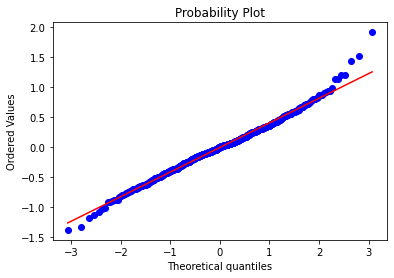

In [29]:
# type your code here
from scipy.stats import probplot

probplot(model.resid,plot = plt)
plt.show()

In [30]:
stats.shapiro(model.resid)

ShapiroResult(statistic=0.9900586009025574, pvalue=0.00021029058552812785)

data is not normal

<a id="ml_perf"> </a>
## 6. Model Performance

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Build a full model on 70% of the given data. Calculate the mean square error and the root mean square error on the test set.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
# type your code here
FEV = add_constant(FEV)
from sklearn.model_selection import train_test_split
x= FEV.drop('FEV',axis = 1)
y = FEV.FEV
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .30,random_state = 0)

In [32]:
model = OLS(ytrain,xtrain).fit()

pred_train = model.predict(xtrain)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytrain,pred_train) 
rmse = np.sqrt(mse)

print('Mean Square Error:',mse)
print('Root Mean Square Error:',rmse)

Mean Square Error: 0.17292803072425283
Root Mean Square Error: 0.41584616232959615


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Calculate the mean absolute error and the  mean absolute percentage error for the test set using the model in Q18. Compare the values of RMSE and MAE. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
# type your code here
from sklearn.metrics import mean_absolute_error

pred_test = model.predict(xtest)
mae = mean_absolute_error(ytest,pred_test)

print('Mean Absolute Error:',mae)
print('Root Mean Square Error:',rmse)

Mean Absolute Error: 0.2942452447433937
Root Mean Square Error: 0.41584616232959615


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build the full model on 80% of the given data and check if the model is overfitted? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [34]:
# type your code here
FEV = add_constant(FEV)

from sklearn.model_selection import train_test_split

x= FEV.drop('FEV',axis = 1)
y = FEV.FEV

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .20,random_state = 0)

In [35]:
OLS(ytrain,xtrain).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     434.9
Date:                Sat, 04 Feb 2023   Prob (F-statistic):          5.20e-164
Time:                        18:54:29   Log-Likelihood:                -281.74
No. Observations:                 523   AIC:                             573.5
Df Residuals:                     518   BIC:                             594.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6012      0.254    -18.121      0.000      -5.100      -4.102
Age            0.0585      0.011      5.479      0.000       0.038       0.080
Height         0.1079      0.005     19.969      0.000       0.097       0.119
Gender         0.1265      0.038      3.374      0.001       0.053       0.200
Smoke         -0.1360      0.067     -2.040      0.042      -0.267      -0.005
==============================================================================
Omnibus:                        9.497   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               12.267
Skew:                           0.185   Prob(JB):                      0.00217
Kurtosis:                       3.653   Cond. No.                         869.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model show that it is a good model